In [1]:
import warnings
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

Define Poisson Modulated Neuronal Spike Train Functions

In [2]:
# Starter code for reference
def poisson_modulated_neuron(firing_rate, duration, dt):
    time_points = np.arange(0, duration, dt)
    poisson_spike_train = np.random.poisson(firing_rate * dt, size=len(time_points))
    spikes = np.where(poisson_spike_train > 0)[0]
    
    return time_points, spikes

def plot_raster(time_points, spikes):
    plt.eventplot(spikes, color='black', linewidths=2)
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron Index')
    plt.title('Poisson Modulated Spiking Neuron Raster Plot')
    plt.show()

# QUESTION 1: 20 POINTS
1. Create 10 Poisson modulated spiking trains, each 1 second long, with a mean firing rate of 1 Hz. Plot a raster plot of the spikes for the 10 trials. Find the time such that the total number of spikes in each spike train is 1000.


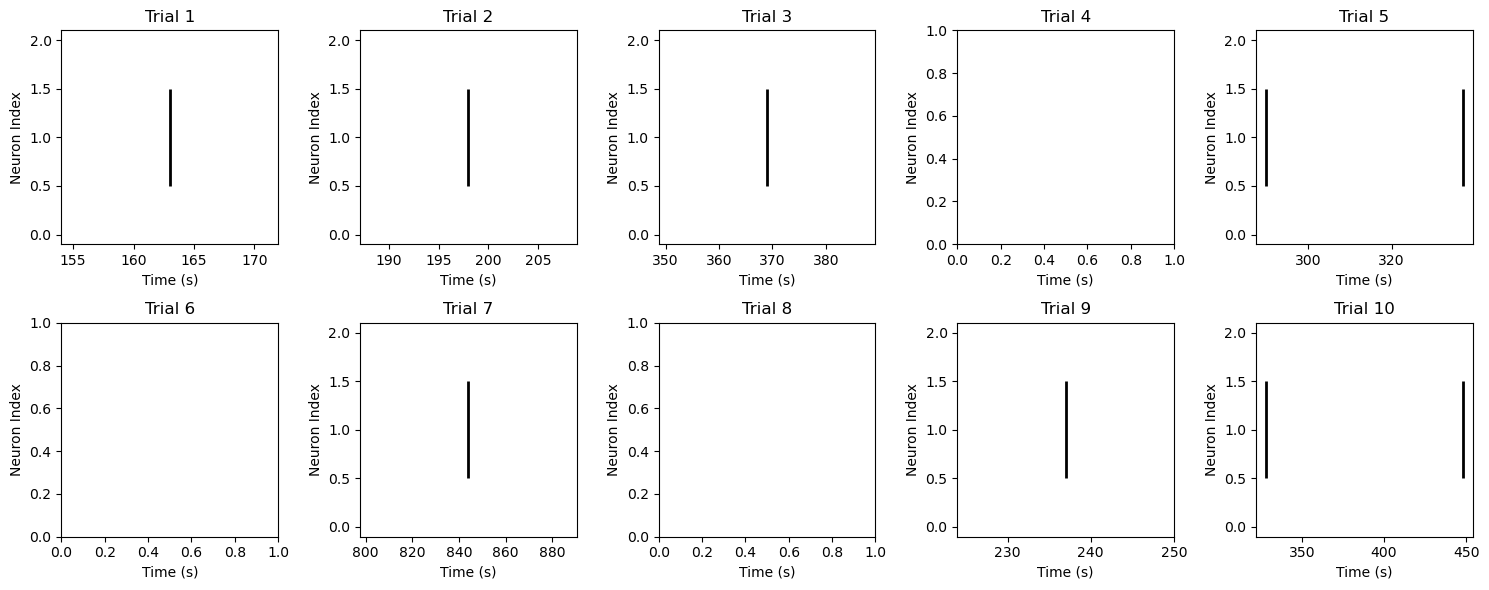

In [4]:
def plot_raster(ax, spikes, trial_num):
    ax.eventplot(spikes, color='black', linewidths=2)
    ax.set_title(f'Trial {trial_num}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Neuron Index')

# Parameters
num_trials = 10
firing_rate = 1  # Hz
duration = 1  # second
dt = 0.001  # time step

# Create a figure with subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(num_trials):
    _, spikes = poisson_modulated_neuron(firing_rate, duration, dt)
    plot_raster(axs[i], spikes, trial_num=i+1)

plt.tight_layout()
plt.show()

1b. If λ = 1 Hz, it means there is 1 event per second on average. To accumulate 1000 events, it would, on average, take 1000 seconds, as 1000 events / 1 event per second = 1000 seconds.

However, it's important to note that due to the nature of the Poisson process, the actual number of events in each second is random. Therefore, the exact time at which the total number of spikes reaches 1000 will vary in each trial. The calculated time of 1000 seconds is an average or expected value.

Let's run 10 test trials. If we increased the number of trials the mean value found in the trials would approach the expected value of 1,000 seconds to find 1,000 spikes firing at a 1 Hz rate. 

In [13]:
def find_time_for_spikes(firing_rate, target_spikes, dt):
    time = 0
    total_spikes = 0
    while total_spikes < target_spikes:
        spikes_this_interval = np.random.poisson(firing_rate * dt)
        total_spikes += spikes_this_interval
        time += dt
    return time

# Parameters
num_trials = 10
firing_rate = 1  # Hz
target_spikes = 1000
dt = 0.001  # time step

# Calculate the time to reach 1000 spikes for each trial
times_to_reach_1000_spikes = [find_time_for_spikes(firing_rate, target_spikes, dt) for _ in range(num_trials)]

# Calculate the mean time
mean_time = np.mean(times_to_reach_1000_spikes)
print("Times to reach 1000 spikes for each trial:\n", ['{:.2f}'.format(time) for time in times_to_reach_1000_spikes])
print("----------")
print("Mean time to reach 1000 spikes: {:.2f} seconds".format(mean_time))

Times to reach 1000 spikes for each trial:
 ['1036.25', '1002.66', '1058.32', '1019.16', '1046.59', '1006.68', '997.34', '1010.76', '996.23', '989.33']
----------
Mean time to reach 1000 spikes: 1016.33 seconds


# QUESTION 2: 20 POINTS
2.1 Create 10 Poisson modulated spiking trains, each 1 second long, with a time-dependent firing rate sin(2(t + i)) Hz, where t is the time and i is the neuron index. Plot a raster plot of the spikes for these 10 neurons.

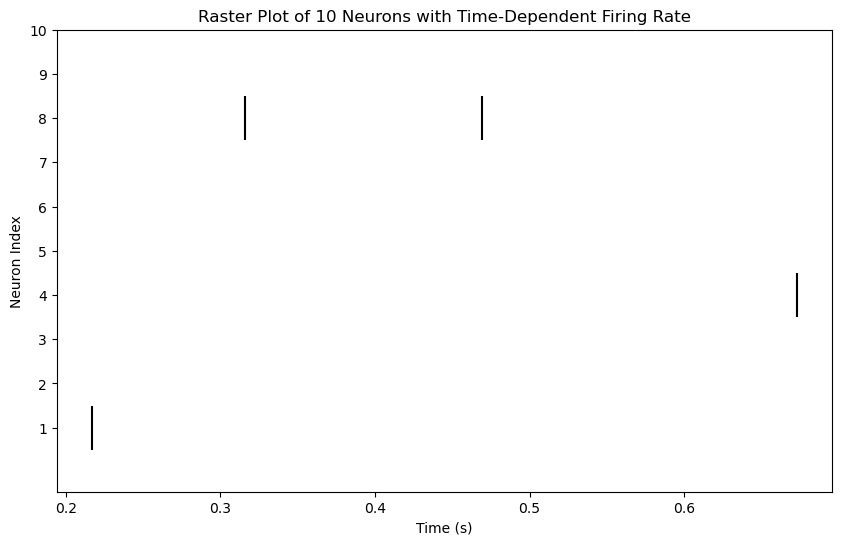

In [20]:
# Now with varying spike rate
def poisson_modulated_neuron_varying_rate(duration, dt, neuron_index):
    time_points = np.arange(0, duration, dt)
    spikes = []

    for t in time_points:
        rate = np.sin(2 * (t + neuron_index))
        if rate < 0:
            rate = 0  # Firing rate cannot be negative
        spike_prob = rate * dt
        if np.random.rand() < spike_prob:
            spikes.append(t)
    
    return spikes

def plot_raster(spikes_list):
    plt.figure(figsize=(10, 6))
    for i, spikes in enumerate(spikes_list):
        plt.eventplot(spikes, lineoffsets=i + 1, color='black')
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron Index')
    plt.title('Raster Plot of 10 Neurons with Time & Index Dependent Firing Rate')
    plt.yticks(range(1, 11))
    plt.show()

# Parameters
num_neurons = 10
duration = 1  # second
dt = 0.001  # time step

# Generate and plot the spike trains
spikes_list = [poisson_modulated_neuron_varying_rate(duration, dt, i) for i in range(num_neurons)]
plot_raster(spikes_list)

2.2 Do a similar exercise for neurons with firing rate 10 · sin(2(t + i)). Explain why the periodic behavior of spiking rate is more clearly visible in the second scenario.

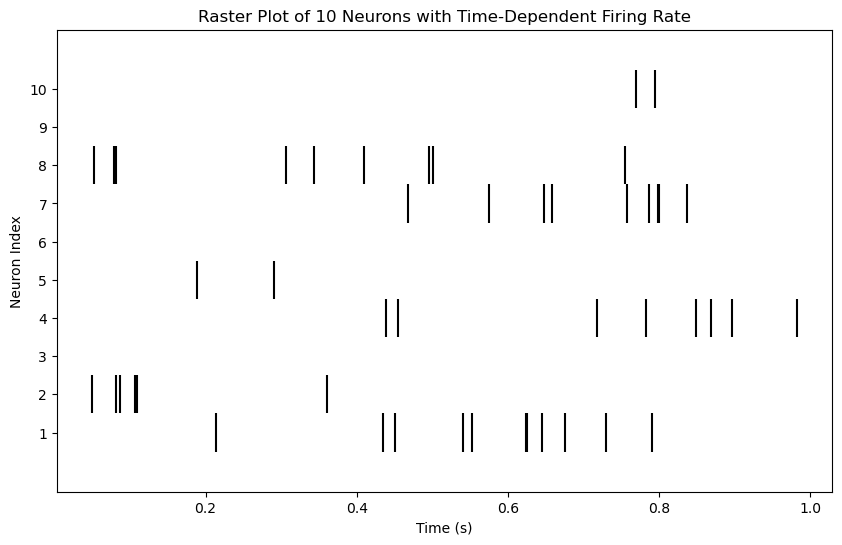

In [21]:
def poisson_modulated_neuron_varying_rate_higher_amplitude(duration, dt, neuron_index):
    time_points = np.arange(0, duration, dt)
    spikes = []

    for t in time_points:
        rate = 10 * np.sin(2 * (t + neuron_index))  # Updated firing rate
        if rate < 0:
            rate = 0  # Firing rate cannot be negative
        spike_prob = rate * dt
        if np.random.rand() < spike_prob:
            spikes.append(t)
    
    return spikes

# Generate and plot the spike trains with the higher amplitude firing rate
spikes_list_higher_amplitude = [poisson_modulated_neuron_varying_rate_higher_amplitude(duration, dt, i) for i in range(num_neurons)]
plot_raster(spikes_list_higher_amplitude)

In the second scenario, by multiplying the sinusoidal function by 10, the firing rate oscillates between -10 and 10 Hz. After rectifying negative rates to 0, the firing rate effectively varies between 0 and 10 Hz.
The increased amplitude leads to a higher spike probability (since spike_prob is proportional to the firing rate). At the peak of the sinusoidal function, the firing rate reaches 10 Hz, significantly increasing the likelihood of spikes occurring during these peaks. This increase in amplitude enhances the contrast between the periods of high activity and low activity. In the raster plot, this results in more distinct bands or clusters of spikes corresponding to the peaks of the sinusoidal wave, making the periodic behavior more evident.

# QUESTION 3: 40 POINTS
3.1 Say that there are stimuli presentations, ’a’ and ’b’. A neuron fires on average 40 spikes / second (Hz) in condition ’a’ and 80 spikes / second in condition ’b’. The response to condition ’a’ is presented 20 times and condition ’b’ is presented 10 times, with each presentation for 1000 ms. Plot the P.S.T.H for the two stimuli.

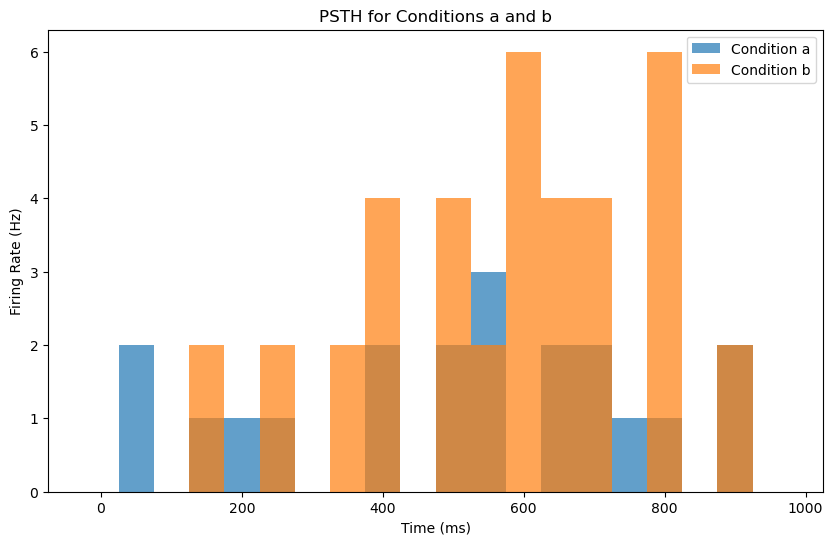

In [28]:
#FIX THIS

def simulate_spike_train(firing_rate, duration, num_trials):
    dt = 0.001  # 1 ms time step
    spike_trains = []

    for _ in range(num_trials):
        time_points = np.arange(0, duration, dt)
        spikes = np.random.poisson(firing_rate * dt, size=len(time_points))
        spike_trains.append(spikes)

    return np.array(spike_trains)

def plot_psth(spike_trains, duration, num_trials, label):
    dt = 0.001  # 1 ms time step
    bin_size = 50  # Bin size in ms
    num_bins = int(duration / bin_size)
    
    # Sum spikes across trials and convert to Hz (spikes/s)
    psth = np.sum(spike_trains, axis=0) / (num_trials * bin_size / 1000.0)

    plt.bar(np.arange(num_bins) * bin_size, psth[:num_bins], width=bin_size, alpha=0.7, label=label)

# Parameters
duration = 1000  # Duration of each trial in ms
num_trials_a = 20  # Number of trials for condition 'a'
num_trials_b = 10  # Number of trials for condition 'b'
firing_rate_a = 40  # Firing rate in Hz for condition 'a'
firing_rate_b = 80  # Firing rate in Hz for condition 'b'

# Simulate spike trains
spike_trains_a = simulate_spike_train(firing_rate_a, duration, num_trials_a)
spike_trains_b = simulate_spike_train(firing_rate_b, duration, num_trials_b)

# Plot PSTH
plt.figure(figsize=(10, 6))
plot_psth(spike_trains_a, duration, num_trials_a, 'Condition a')
plot_psth(spike_trains_b, duration, num_trials_b, 'Condition b')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('PSTH for Conditions a and b')
plt.legend()
plt.show()